In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
from keras.models import load_model
from keras import backend as K
import util
import train_util

In [180]:
def show_log(dir_name, col=None, show_params=True):
    log_file_path = './log/' + dir_name + '/training.log'
    log = pd.read_csv(log_file_path)
    if col is not None:
        log = log[col]
    log.plot(x='epoch')
    if show_params:
        show_train_params(dir_name)
    return log

def show_train_params(dir_name):
    model = load_model('./log/'+ dir_name + '/best_weights.hdf5', custom_objects={
        'mean_iou': train_util.mean_iou, 
        'dice_p_bce':train_util.dice_p_bce, 
        'dice_coef':train_util.dice_coef,
        'true_positive_rate':train_util.true_positive_rate,
    })
    print('loss_func: {}'.format(model.loss))
    print('optimizer: {}'.format(model.optimizer.__class__.__name__))    
    print('lr: {}'.format(K.eval(model.optimizer.lr)))

/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


min val_loss: 0.09316140397762257 at 265
max val_iou_coef: 0.8201181764403979 at 1154
max val_mean_iou_threshold: 0.7937500004967054 at 2508
max val_binary_accuracy: 0.9660720527172088 at 52


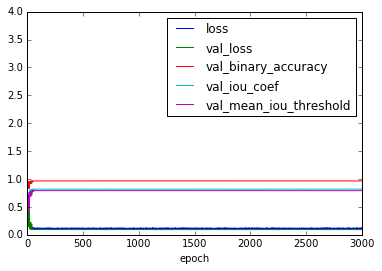

In [182]:

log1 = show_log('2018_1005_2350', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# resnet unet
# loss =binary_crossentropy
# no depth
# c = optimizers.adam(lr = 0.01)
# reduce_lr = ReduceLROnPlateau(monitor='mean_iou_threshold', mode='max', factor=0.5, patience=5, min_lr=0.0001, verbose=1)

/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


min val_loss: 0.4217553411920865 at 105
max val_iou_coef: 0.7736594900488853 at 75
max val_mean_iou_threshold: 0.7328125014901161 at 75
max val_binary_accuracy: 0.9532615790764492 at 86


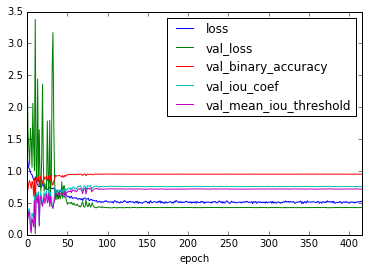

In [179]:

log1 = show_log('2018_1005_1704', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# resnet unet
# loss = bce +1-dice
# no depth
#default adam  optimizer
c = optimizers.adam(lr = 0.01)
reduce_lr = ReduceLROnPlateau(monitor='mean_iou_threshold', mode='max', factor=0.5, patience=5, min_lr=0.0001, verbose=1)

/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


min val_loss: 0.3474448751658201 at 113
max val_iou_coef: 0.8028721933563551 at 114
max val_mean_iou_threshold: 0.7750000009934107 at 116
max val_binary_accuracy: 0.961094503601392 at 142


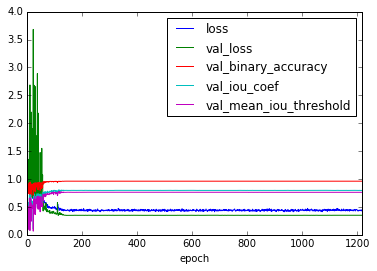

In [175]:

log1 = show_log('2018_1005_0116', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# resnet unet
# loss = bce +1-dice
# no depth
#default adam  optimizer


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


min val_loss: 0.3642831686884165 at 57
max val_iou_coef: 0.8023477842410406 at 260
max val_mean_iou_threshold: 0.7688802083333334 at 916
max val_binary_accuracy: 0.9576790332794191 at 54


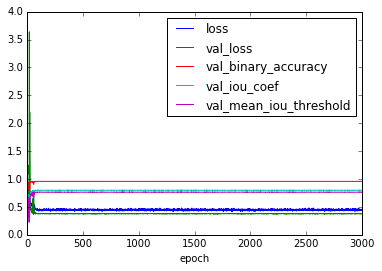

In [172]:
log1 = show_log('2018_0811_1836', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# lighter unet
# loss = bce +1-dice
# no depth
#default adam  optimizer
# include bad masks


min val_loss: 0.14666673447936773 at 40
max val_iou_coef: 0.7601960798104604 at 52
max val_mean_iou_threshold: 0.7141927058498064 at 52
max val_binary_accuracy: 0.9446831544240316 at 32


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


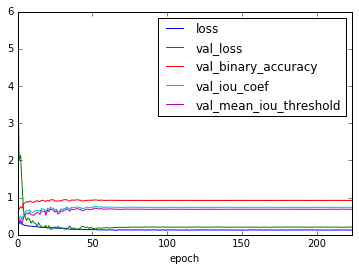

In [147]:

log1 = show_log('2018_0811_1155', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# deeplab unet
# loss = bce
# not normed depth
#default adam  optimizer
# ELU -> batchnorm

min val_loss: 0.282323465993007 at 12
max val_iou_coef: 0.6298919481535753 at 12
max val_mean_iou_threshold: 0.5416666629413763 at 12
max val_binary_accuracy: 0.8848295211791992 at 26


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


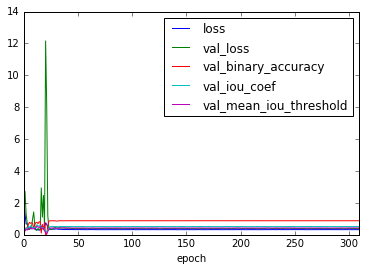

In [145]:

log1 = show_log('2018_0811_0055', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# deeplab mobile net
# loss = bce
# normed depth
#default adam  optimizer

/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


min val_loss: 0.13797696198647222 at 174
max val_iou_coef: 0.7445057655374209 at 176
max val_mean_iou_threshold: 0.6997395778695742 at 176
max val_binary_accuracy: 0.9151147206624348 at 69


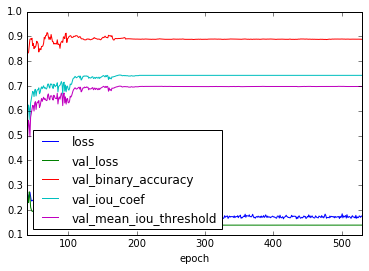

In [141]:
log1 = show_log('2018_0810_1553', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# deeplab mobile net
# loss = bce
# normed depth
#default adam  optimizer

/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


min val_loss: 0.15039664848397175 at 151
max val_iou_coef: 0.7294450427095095 at 128
max val_mean_iou_threshold: 0.6848958333333334 at 128
max val_binary_accuracy: 0.9117672443389891 at 95


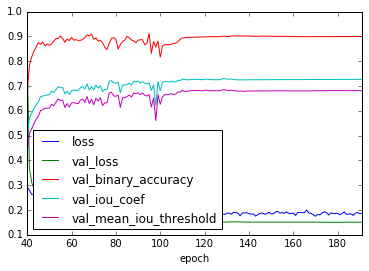

In [135]:
log1 = show_log('2018_0810_1240', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# deeplab mobile net
# loss = bce
# no normed depth
#default adam  optimizer

/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


min val_loss: 3.8235995471477513 at 0
max val_iou_coef: 0.40234413494666416 at 0
max val_mean_iou_threshold: 0.40234375 at 0
max val_binary_accuracy: 0.0 at 0


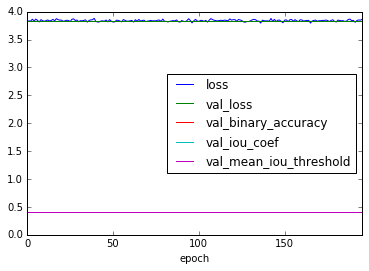

In [123]:
log1 = show_log('2018_0809_1523', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# deeplab xception
# loss = bce
# no depth
# optimizer = keras.optimizers.Nadam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=4e-5)

min val_loss: 0.09357921111707886 at 121
max val_iou_coef: 0.8295640647411346 at 125
max val_mean_iou_threshold: 0.7941406319538752 at 125
max val_binary_accuracy: 0.8889292875925698 at 106


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


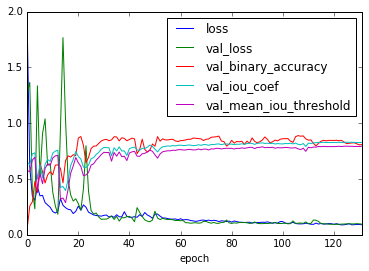

In [121]:
log1 = show_log('2018_0809_1303', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# deeplab mobilenet
# loss = bce
# no depth
# optimizer : defaut adam
#OS :8関係なさそうだけど

min val_loss: 0.14922836081435284 at 92
max val_iou_coef: 0.7571487153569857 at 97
max val_mean_iou_threshold: 0.7143229146798452 at 97
max val_binary_accuracy: 0.9215308030446372 at 72


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


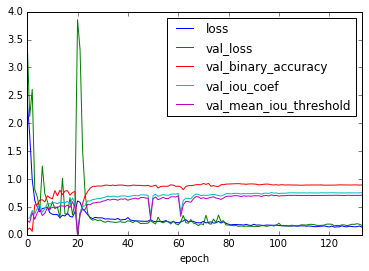

In [112]:
log1 = show_log('2018_0809_0930', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# deeplab xecption
# loss = bce
# no depth
# optimizer : defaut adam

min val_loss: 0.09102276790266237 at 111
max val_iou_coef: 0.8241178691387177 at 114
max val_mean_iou_threshold: 0.7859374955296516 at 114
max val_binary_accuracy: 0.9430441061655679 at 48


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


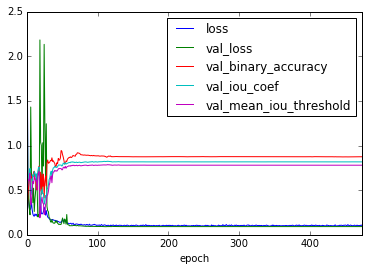

In [102]:
log1 = show_log('2018_0808_2341', col=['epoch','loss', 'val_loss', 'val_binary_accuracy','val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
# print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# deeplab mobilenet
# loss = bce
# no depth
# optimizer : defaut adam


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


min val_loss: 0.20854445329556864 at 66
max val_dice_coef: 0.4136014605561893 at 70
max val_iou_coef: 0.6630053495367368 at 74
max val_mean_iou_threshold: 0.5966145830849806 at 74
max val_binary_accuracy: 0.9182559649149576 at 66


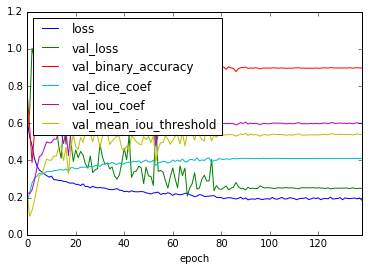

In [72]:
log1 = show_log('2018_0808_2045', col=['epoch','loss', 'val_loss', 'val_binary_accuracy', 'val_dice_coef', 'val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# loss = bce
# depth is not normalized
# optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True) 

/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


min val_loss: 0.5723146225015322 at 46
max val_dice_coef: 0.20866317177812255 at 0
max val_iou_coef: 0.10091938373322287 at 0
max val_mean_iou_threshold: 0.06901041666666667 at 46
max val_binary_accuracy: 0.7627321879069009 at 46


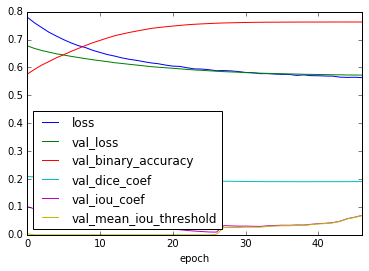

In [48]:
log1 = show_log('2018_0808_1951', col=['epoch','loss', 'val_loss', 'val_binary_accuracy', 'val_dice_coef', 'val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# loss = bce
# depth is not normalized
# optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=True) 

/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


min val_loss: 0.553105798860391 at 7
max val_dice_coef: 0.22079172482093176 at 52
max val_iou_coef: 0.4023442156612873 at 5
max val_mean_iou_threshold: 0.40234375 at 5
max val_binary_accuracy: 0.7631603876749674 at 17


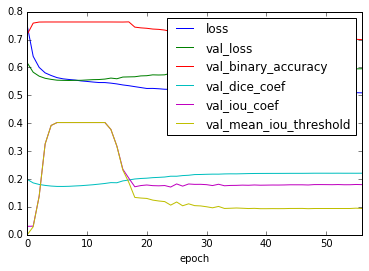

In [49]:
log1 = show_log('2018_0808_1854', col=['epoch','loss', 'val_loss', 'val_binary_accuracy', 'val_dice_coef', 'val_iou_coef', 'val_mean_iou_threshold'], show_params=False)
print('min val_loss: {} at {}'.format(np.min(log1.val_loss), np.argmin(log1.val_loss)))
print('max val_dice_coef: {} at {}'.format(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef)))
print('max val_iou_coef: {} at {}'.format(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef)))
print('max val_mean_iou_threshold: {} at {}'.format(np.max(log1.val_mean_iou_threshold), np.argmax(log1.val_mean_iou_threshold)))
print('max val_binary_accuracy: {} at {}'.format(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy)))
# loss = bce
# depth is not normalized
# optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=True) 

0.17328604124486446 62
0.4486013253529865 130
0.7079165478547415 49
0.9292164643605552 62


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


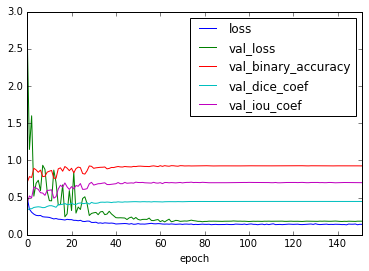

In [29]:
log1 = show_log('2018_0808_1149', col=['epoch','loss', 'val_loss', 'val_binary_accuracy', 'val_dice_coef', 'val_iou_coef'], show_params=False)
print(np.min(log1.val_loss), np.argmin(log1.val_loss))
print(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef))
print(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef))
print(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy))
# loss = bce
# depth is normalized
#optimizer default adam

/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


0.09042569327478607 137
0.4912875865896543 142
0.8141503185033798 140
0.9666161537170409 132


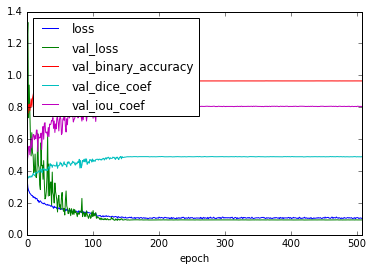

In [13]:
log1 = show_log('2018_0808_0240', col=['epoch','loss', 'val_loss', 'val_binary_accuracy', 'val_dice_coef', 'val_iou_coef'], show_params=False)
print(np.min(log1.val_loss), np.argmin(log1.val_loss))
print(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef))
print(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef))
print(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy))
# loss = bce
# depth is not normalized
#optimizer default adam
# batchnorm -> ELU

0.3329152626295884 95
0.7963686709602674 104
0.8039519637823105 104
0.9628360271453856 102


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


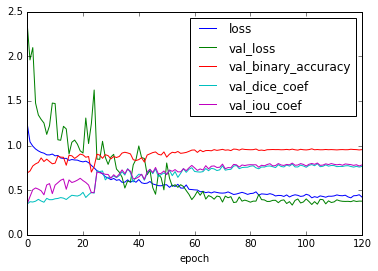

In [78]:
# pb score : 0.70 crf 0.72
og1 = show_log('2018_0807_2002', col=['epoch','loss', 'val_loss', 'val_binary_accuracy', 'val_dice_coef', 'val_iou_coef'], show_params=False)
print(np.min(log1.val_loss), np.argmin(log1.val_loss))
print(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef))
print(np.max(log1.val_iou_coef), np.argmax(log1.val_iou_coef))
print(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy))

loss_func: <function dice_p_bce at 0x7f52dc221620>
optimizer: Adam
lr: 3.200000264769187e-07
0.8234564512968063 162
0.4331576911111673 277
0.9185638427734376 183


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


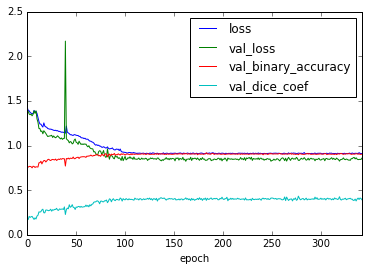

In [17]:
log1 = show_log('2018_0807_1212', col=['epoch','loss', 'val_loss', 'val_binary_accuracy', 'val_dice_coef'])
print(np.min(log1.val_loss), np.argmin(log1.val_loss))
print(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef))
print(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy))

In [30]:

pd.read_csv('./log/2018_0808_0240/training.log')

,Unnamed: 0,epoch,learning_rate,binary_accuracy,dice_coef,iou_coef,loss,lr,true_positive_rate,val_binary_accuracy,val_dice_coef,val_iou_coef,val_loss,val_true_positive_rate
0,0,0,1.000000e-03,0.875017,0.289868,0.519140,0.343966,NaN,0.696708,0.781194,0.352012,0.458685,1.199511,0.914753
1,1,1,1.000000e-03,0.886772,0.298198,0.566740,0.297270,1.000000e-03,0.711413,0.762709,0.353667,0.492423,1.332834,0.930859
2,2,2,1.000000e-03,0.895648,0.303673,0.578575,0.278768,1.000000e-03,0.725619,0.805846,0.361484,0.545994,0.734258,0.914049
3,3,3,1.000000e-03,0.896038,0.307691,0.587331,0.271119,1.000000e-03,0.725753,0.820326,0.368107,0.556218,0.938957,0.915678
4,4,4,1.000000e-03,0.901329,0.316223,0.585677,0.259839,1.000000e-03,0.742050,0.778773,0.360223,0.502362,0.781546,0.943287
5,5,5,1.000000e-03,0.901688,0.316943,0.601375,0.256390,1.000000e-03,0.738914,0.806638,0.363046,0.538332,0.600339,0.924902
6,6,6,1.000000e-03,0.906774,0.320658,0.610971,0.249985,1.000000e-03,0.748756,0.853073,0.370347,0.607566,0.494799,0.905528
7,7,7,1.000000e-03,0.905751,0.318253,0.606909,0.246066,1.000000e-03,0.753287,0.801776,0.362086,0.544245,0.640657,0.930634
8,8,8,1.000000e-03,0.906886,0.327446,0.611018,0.246209,1.000000e-03,0.760741,0.855100,0.372069,0.593734,0.515356,0.901676
9,9,9,1.000000e-03,0.910540,0.330118,0.605225,0.234780,1.000000e-03,0.761910,0.874827,0.386039,0.629026,0.499167,0.888336


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


1.012250360915471 181
0.35145747278527306 89
0.8528341963542457 138


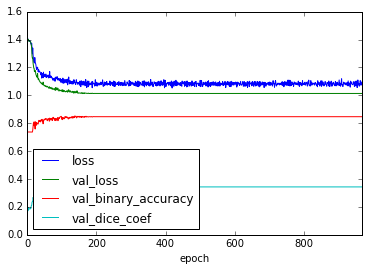

In [13]:
log1 = show_log('2018_0731_1659', col=['epoch','loss', 'val_loss', 'val_binary_accuracy', 'val_dice_coef'])
print(np.min(log1.val_loss), np.argmin(log1.val_loss))
print(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef))
print(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy))

/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


1.3955447508314276 2
0.3181996603704663 82
0.7370357565524339 0


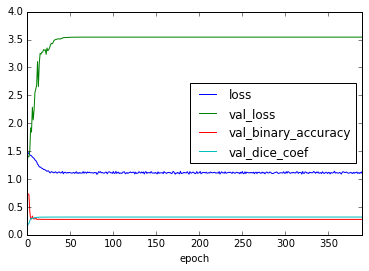

In [12]:
log1 = show_log('2018_0731_1606', col=['epoch','loss', 'val_loss', 'val_binary_accuracy', 'val_dice_coef'])
print(np.min(log1.val_loss), np.argmin(log1.val_loss))
print(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef))
print(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy))

In [298]:
# s = show_log('2018_0729_1817')

loss_func: <function dice_p_bce at 0x7fbd1cc27d08>
optimizer: Adam
lr: -0.053646065294742584
0.47541033827094 460
0.814239078438374 1186
0.9391208047425532 452


/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/root/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


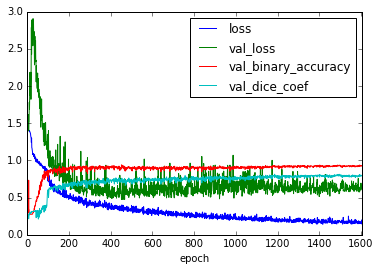

In [41]:
#pb score : 0.67
log1 = show_log('2018_0729_1817', col=['epoch','loss', 'val_loss', 'val_binary_accuracy', 'val_dice_coef'])
print(np.min(log1.val_loss), np.argmin(log1.val_loss))
print(np.max(log1.val_dice_coef), np.argmax(log1.val_dice_coef))
print(np.max(log1.val_binary_accuracy), np.argmax(log1.val_binary_accuracy))
# train_util.train(unet_m, train_gen, val_gen, loss=train_util.dice_p_bce, metrics=[train_util.dice_coef, 'binary_accuracy', train_util.true_positive_rate], epochs=3000, steps_per_epoch=32, optimizer=Adam(1e-4, decay=1e-6))

loss_func: <function dice_p_bce at 0x7fbd1cc27d08>
optimizer: Adam
lr: -0.04522804915904999
0.4896434644347291
0.9062417149543762
0.9262052014431794


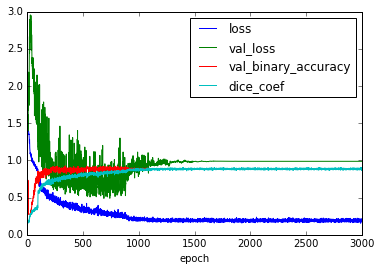

In [42]:
log1 = show_log('2018_0730_0057', col=['epoch','loss', 'val_loss', 'val_binary_accuracy', 'dice_coef'])
print(np.min(log1.val_loss))
print(np.max(log1.dice_coef))
print(np.max(log1.val_binary_accuracy))

# np.min(log1.val_loss)

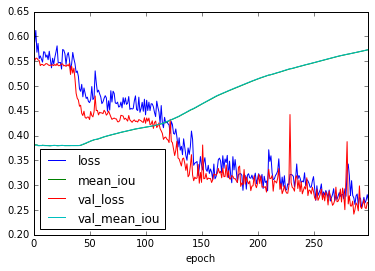

In [63]:
show_log('2018_0723_1717')

0.128431546743624

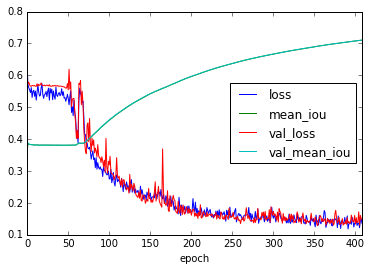

In [182]:
log2 = show_log('2018_0728_2026')
np.min(log2.val_loss)
# unet_256

0.16008224118031694

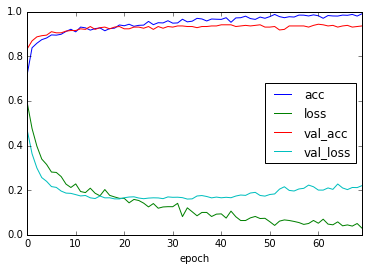

In [159]:
log3 = show_log('2018_0728_1659')
np.min(log3.val_loss)

loss_func: binary_crossentropy
optimizer: Adam
lr: -0.1905452162027359


0.07965438623354798

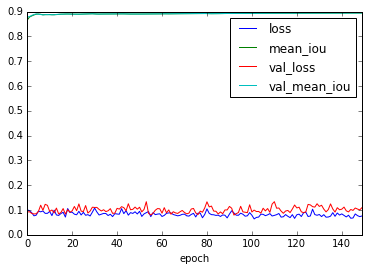

In [4]:
log3 = show_log('2018_0727_2358')
np.min(log3.val_loss)

0.09741833055233894

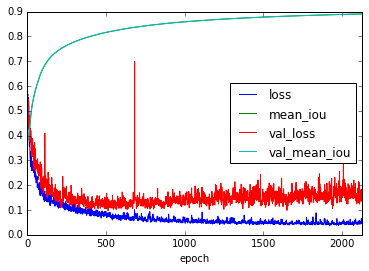

In [139]:
log3 = show_log('2018_0727_1808')
np.min(log3.val_loss)

0.1815815817152933

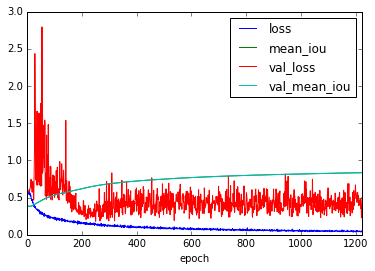

In [180]:
log3 = show_log('2018_0729_0020')
np.min(log3.val_loss)

In [ ]:
log.plot(x='epoch')

In [7]:
logs = [{'loss':1, 'acc':0.4}, {'loss':0.4, 'acc':0.2}]
lrs = [2, 3]

In [10]:
pd.DataFrame(logs)
# pd.DataFrame({'lr': lrs})


,acc,loss
0,0.4,1.0
1,0.2,0.4


In [13]:
logs.append({'loss':4, 'acc':5})

In [26]:
logs_list = []
logs = {'loss':4, 'acc':5}
logs_list.append(logs)
logs = {'loss':2, 'acc':1}
logs_list.append(logs)
logs = {'loss':8, 'acc':6}
logs_list.append(logs)
print(logs_list)

[{'acc': 5, 'loss': 4}, {'acc': 1, 'loss': 2}, {'acc': 6, 'loss': 8}]


In [17]:
class testObj(object):
    def __init__(self):
        self.logs_list = []
        
    def test_f(self, logs={}):
        self.logs_list.append(logs)

In [22]:
obj = testObj()

In [34]:
logs = {'loss':8, 'acc':6}
obj.test_f(logs)
logs = {'loss':18, 'acc':16}
obj.test_f(logs)

In [35]:
logs.copy()

{'acc': 16, 'loss': 18}

In [31]:
id(logs)

140450208967816

In [32]:
logs['loss'] = 134

In [33]:
obj.logs_list

[{'acc': 3, 'loss': 1},
 {'acc': 4, 'loss': 3},
 {'acc': 6, 'loss': 8},
 {'acc': 16, 'loss': 18},
 {'acc': 6, 'loss': 8},
 {'acc': 16, 'loss': 134}]

In [19]:
import keras
unet_m = util.unet_model(min_filter_num=16, with_vec=True)
unet_m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
from keras import backend as K
K.eval(unet_m.optimizer.lr)

0.001

In [31]:
0.5 + 0.55 + 0.6 + 0.65 + 0.7 + 0.75 + 0.8 + 0.85 + 0.9 + 0.95 / 1 0

7.25

In [32]:
0.5 + 0.55 + 0.6/7.25

1.1327586206896552